In [42]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [43]:
# filename = 'accel_gyro_calib_data_XDOWN.csv'

# # Initialize an empty dictionary to store the data
# gyr_x = []
# gyr_y = []
# gyr_z = []
# gyro_x = []
# gyro_x = []

# # Read the CSV file
# with open(filename, 'r') as file:
#     reader = csv.reader(file)
#     for row in reader:
#         # Split each row by comma and store the values in the dictionary
#         key, value = row
#         data[key] = float(value)

# # Print the data
# for key, value in data.items():
#     print(f"{key}: {value}")

In [52]:
filename = 'accel_gyro_calib_data_XUP.csv'

# Initialize an empty dictionary to store the data
gyr_x = []
gyr_y = []
gyr_z = []
acc_x = []
acc_y = []
acc_z = []
data = {
    'gyr_x':[],
    'gyr_y':[],
    'gyr_z':[],
    'acc_x':[],
    'acc_y':[],
    'acc_z':[]
}

# Read the CSV file
with open(filename, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        # Split each row by comma and store the values in the dictionary
        key, value = row
        data[key].append(float(value))

In [53]:
# Print the data
# Calculate mean and standard deviation

means = {
    'gyr_x':0,
    'gyr_y':0,
    'gyr_z':0,
    'acc_x':0,
    'acc_y':0,
    'acc_z':0
}

variances = {
    'gyr_x':0,
    'gyr_y':0,
    'gyr_z':0,
    'acc_x':0,
    'acc_y':0,
    'acc_z':0
}


for key in data.keys():
    mean_value = np.mean(data[key])
    variance = np.std(data[key])

    means[key] = mean_value
    variances[key] = variance



In [54]:
means, variances

({'gyr_x': 0.023461514634847795,
  'gyr_y': 0.032662799032722976,
  'gyr_z': 0.025085952195352697,
  'acc_x': 1.0438745300177898,
  'acc_y': 0.011133938508400583,
  'acc_z': 0.25662393276472034},
 {'gyr_x': 0.0013179880222443353,
  'gyr_y': 0.0014056273923198912,
  'gyr_z': 0.0016237815300458353,
  'acc_x': 0.003274304716148571,
  'acc_y': 0.003276572697293971,
  'acc_z': 0.005424007552667784})

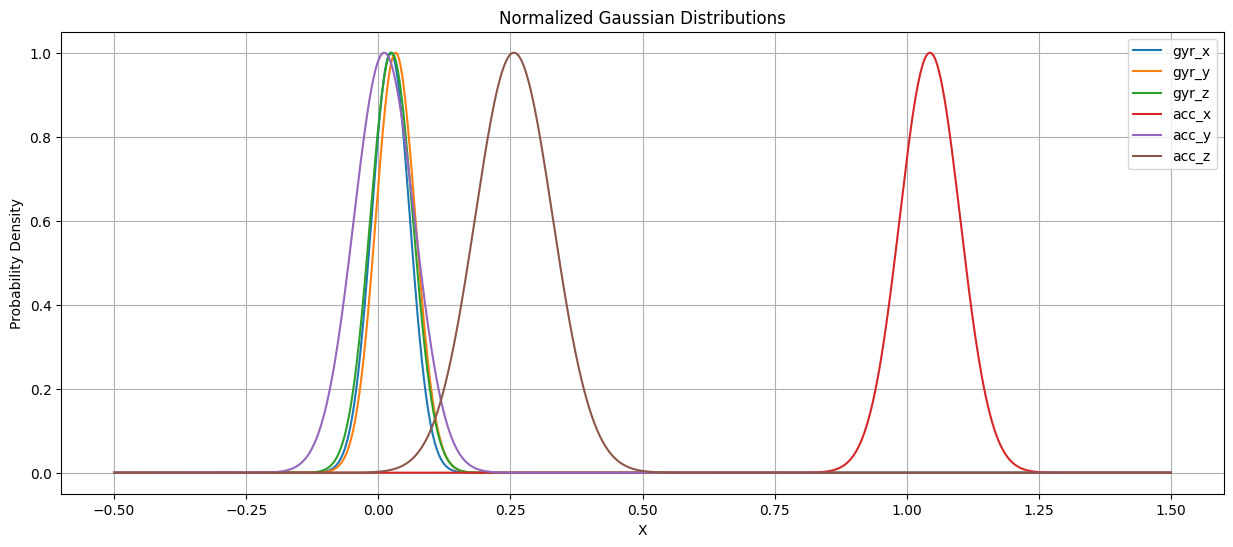

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-0.5,1.5, 1000)

# Plot normalized Gaussian distributions
plt.figure(figsize=(15, 6))

for sensor, mean in means.items():
    variance = variances[sensor]
    # Calculate y values based on the Gaussian distribution formula
    y_unnormalized = np.exp(-((x - mean)**2) / (2 * variance))
    y_normalized = y_unnormalized / np.max(y_unnormalized) 

    # Plot the normalized Gaussian curve
    plt.plot(x, y_normalized, label=f'{sensor}')

plt.title('Normalized Gaussian Distributions')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()
